In [1]:
from pickle import load
from functools import partial
import healpy as hp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from chainconsumer import ChainConsumer

import src.forward_model as FM
import src.beam_functions as BF
import src.sky_models as SM
from anstey.generate import T_CMB
from src.spherical_harmonics import RealSphericalHarmonics, calc_spherical_harmonic_matrix
from src.nregions_models import pix_forward_model_pl, genopt_pix_forward_model_pl
from src.blockmat import BlockMatrix, BlockVector
RS = RealSphericalHarmonics()
from nregions_inference import nuarr
import nregions_inference as NRI
from scipy.optimize import curve_fit
from functools import partial
import alm_polynomial_inference as api

from chainconsumer import ChainConsumer
from emcee import EnsembleSampler

def param_estimator(chain, stats="mean"):
    if stats=="mean":
        theta_est = np.mean(chain, axis=0)
    elif stats=="max":
        c = ChainConsumer()
        c.add_chain(chain, statistics=stats)
        analysis_dict = c.analysis.get_summary(squeeze=True)
        theta_est = np.array([val[1] for val in analysis_dict.values()])
    return theta_est

saveloc = "Alm_polyn/"

In [2]:
api.compare_fm_fid_reconstruction_with21cm(
    lmax=1,
    lmod=1,
    Npoly=5,
    lats=None,
    basemap_err=10,
    chrom=3.4e-2,
    steps=50000,
    savetag=''
)

successfully loaded spherical_harmonic_matrix npix, nalm : 12288 3


/Users/yordani/Documents/boosted_compass/matrix-observer/src/spherical_harmonics.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  almr[idxr_p] = almc[idxc]


successfully loaded spherical_harmonic_matrix npix, nalm : 12288 3
[ 1.92039638e+01  2.73629166e+00  7.25092202e-03  3.85342431e-06
 -3.52687668e-06  1.65140571e+00  2.55782347e+00 -2.46757741e-02
  4.72165142e-03 -7.57093361e-04  3.85771025e-01  2.62105563e+00
  4.15888756e-03 -1.43176881e-03  2.01573137e-04 -6.11252938e+00
  2.55465779e+00 -8.34161513e-03  1.64461678e-03 -2.01841814e-04]
Loaded mean and covar correction for nside<32>_lmax<1>_bmerr<10>


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [24:28<00:00, 34.04it/s]


SAVING CHAIN AS lmax1_lmod1_Npoly5__chain.npy
SAVING DATA AS lmax1_lmod1_Npoly5__data.npy
SAVING ERRORS AS lmax1_lmod1_Npoly5__errs.npy
SAVING PARAMS AS lmax1_lmod1_Npoly5__pars.pkl


loading saves/Alm_corrected/lmax1_lmod1_Npoly5__chain.npy
loading saves/Alm_corrected/lmax1_lmod1_Npoly5__data.npy
loading saves/Alm_corrected/lmax1_lmod1_Npoly5__errs.npy
model pars are {'nuarr': array([ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100.]), 'nside': 32, 'Ntau': 24, 'lats': array([-78, -52, -26,   0,  26,  52,  78]), 'times': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]), 'chrom': 0.034, 'delta': 0.05406835567038138}


/Users/yordani/Documents/boosted_compass/matrix-observer/src/spherical_harmonics.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  almr[idxr_p] = almc[idxc]


successfully loaded spherical_harmonic_matrix npix, nalm : 12288 3


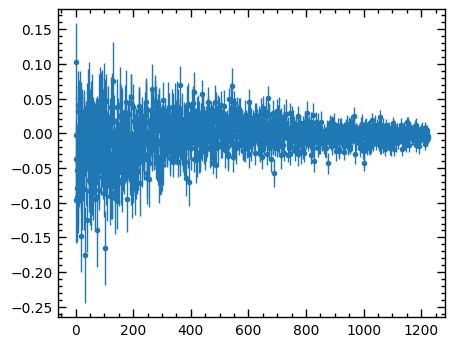

Reduced chi square = 0.023988339209287758


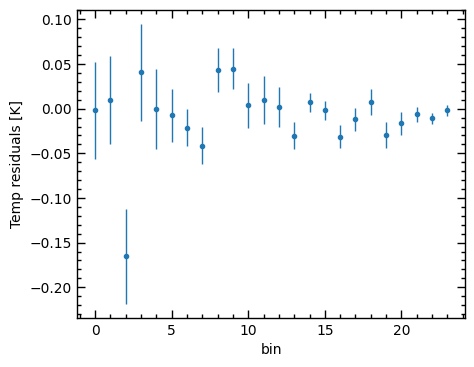

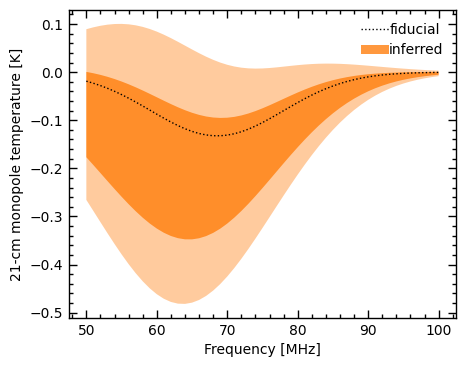

In [3]:
api.plot_chain_with21cm(lmax=1, lmod=1, Npoly=5, savetag='', burn_in=25000, plot_residuals=True)

loading saves/Alm_corrected/lmax1_lmod1_Npoly3__chain.npy


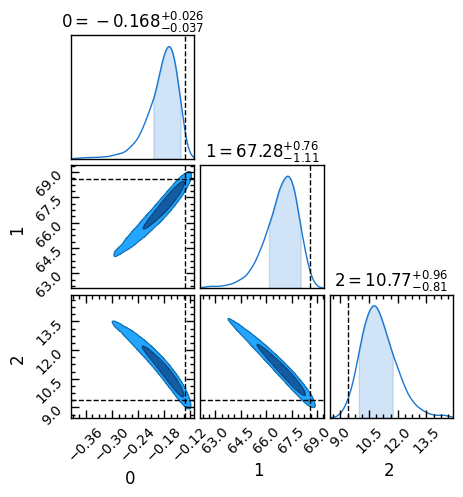

In [2]:
api.plot_corner(lmax=1, lmod=1, Npoly=3, savetag='', burn_in=20000, marginal=True)


In [8]:
from multifrequency_ml_modelling import nontrivial_obs_memopt_missing_modes
nontrivial_obs_memopt_missing_modes(
    Npoly=3,
    lmax=1,
    lmod=1,
    lats=np.array([-26*3, -26*2, -26, 0, 26, 26*2, 26*3]), 
    chrom=3.2e-2, 
    basemap_err=10, 
    err_type='idx', 
    mcmc=True, 
    mcmc_pos=None, 
    steps=10000, 
    burn_in=6000, 
    plotml=False
)

successfully loaded spherical_harmonic_matrix npix, nalm : 12288 3
Data generated with noise 0.05723334805229095 K at 50 MHz in the first bin
Loaded mean and covar correction for nside<32>_lmax<1>_bmerr<10>
1/condition #: 0.007528381850744606
Computing rec alm
Computing chi-sq
Chi-square: 8570.183504437331 len(data): 8568 +/- 130.90454537562857 Nparams: 204


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:33<00:00, 294.79it/s]


bic is  60.686982697855214


MCMC BIC = 43.08324866106044


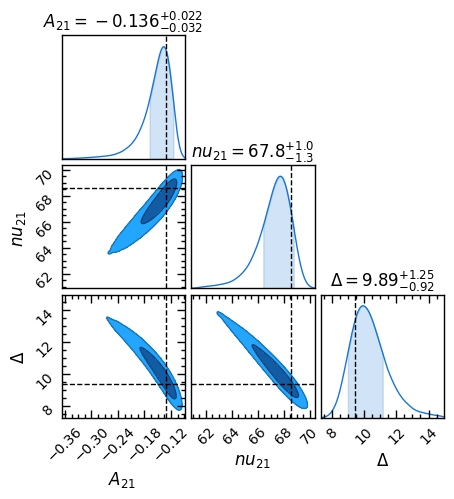

INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode


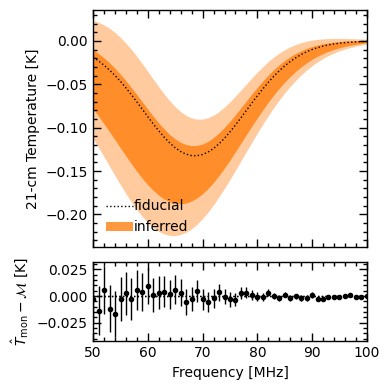

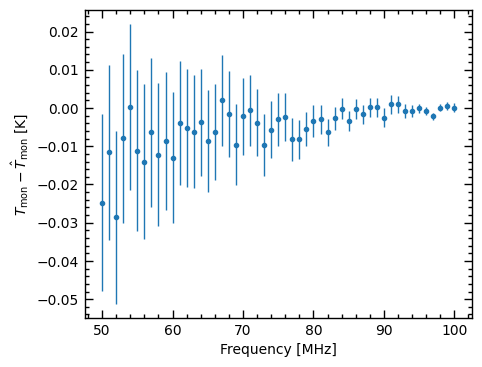

monopole chi-sq 22.209085026964758


In [9]:
from fig_gen import plot_ml_chrom
plot_ml_chrom(Nant=7, Npoly=3, chromstr='3.4e-02', basemap_err=10)